In [1]:
# Imports
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline 

## Download and read the "Real estate valuation data set.xlsx" dataset. You can find the description of the features and targets on the UCI repository website.

In [2]:
house_data = pd.read_excel("Real estate valuation data set.xlsx")

# Printing first 5 records of the dataset
pd.options.display.max_columns = None
house_data.head(20)


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.000,84.879,10,24.983,121.540,37.900
1,2,2012.917,19.500,306.595,9,24.980,121.540,42.200
2,3,2013.583,13.300,561.985,5,24.987,121.544,47.300
3,4,2013.500,13.300,561.985,5,24.987,121.544,54.800
4,5,2012.833,5.000,390.568,5,24.979,121.542,43.100
5,6,2012.667,7.100,2175.030,3,24.963,121.513,32.100
6,7,2012.667,34.500,623.473,7,24.979,121.536,40.300
7,8,2013.417,20.300,287.603,6,24.980,121.542,46.700
8,9,2013.500,31.700,5512.038,1,24.951,121.485,18.800
9,10,2013.417,17.900,1783.180,3,24.967,121.515,22.100


In [3]:
house_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


this dataset contains 414 observation and 8 columns.

there is no missing columns.


In [4]:
df = house_data.copy()

In [5]:
df.columns = df.columns.str.replace(' ', '_')

In [6]:
df.describe()

,No,X1_transaction_date,X2_house_age,X3_distance_to_the_nearest_MRT_station,X4_number_of_convenience_stores,X5_latitude,X6_longitude,Y_house_price_of_unit_area
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,207.500,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,119.656,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,1.000,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,104.250,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,207.500,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,310.750,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,414.000,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


In [7]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["Y_house_price_of_unit_area"], ascending = False, inplace = True)
print(corr.Y_house_price_of_unit_area)

Find most important features relative to target
Y_house_price_of_unit_area                1.000
X4_number_of_convenience_stores           0.571
X5_latitude                               0.546
X6_longitude                              0.523
X1_transaction_date                       0.088
No                                       -0.029
X2_house_age                             -0.211
X3_distance_to_the_nearest_MRT_station   -0.674
Name: Y_house_price_of_unit_area, dtype: float64


In [8]:
df.drop(['No'],axis=1,inplace=True)

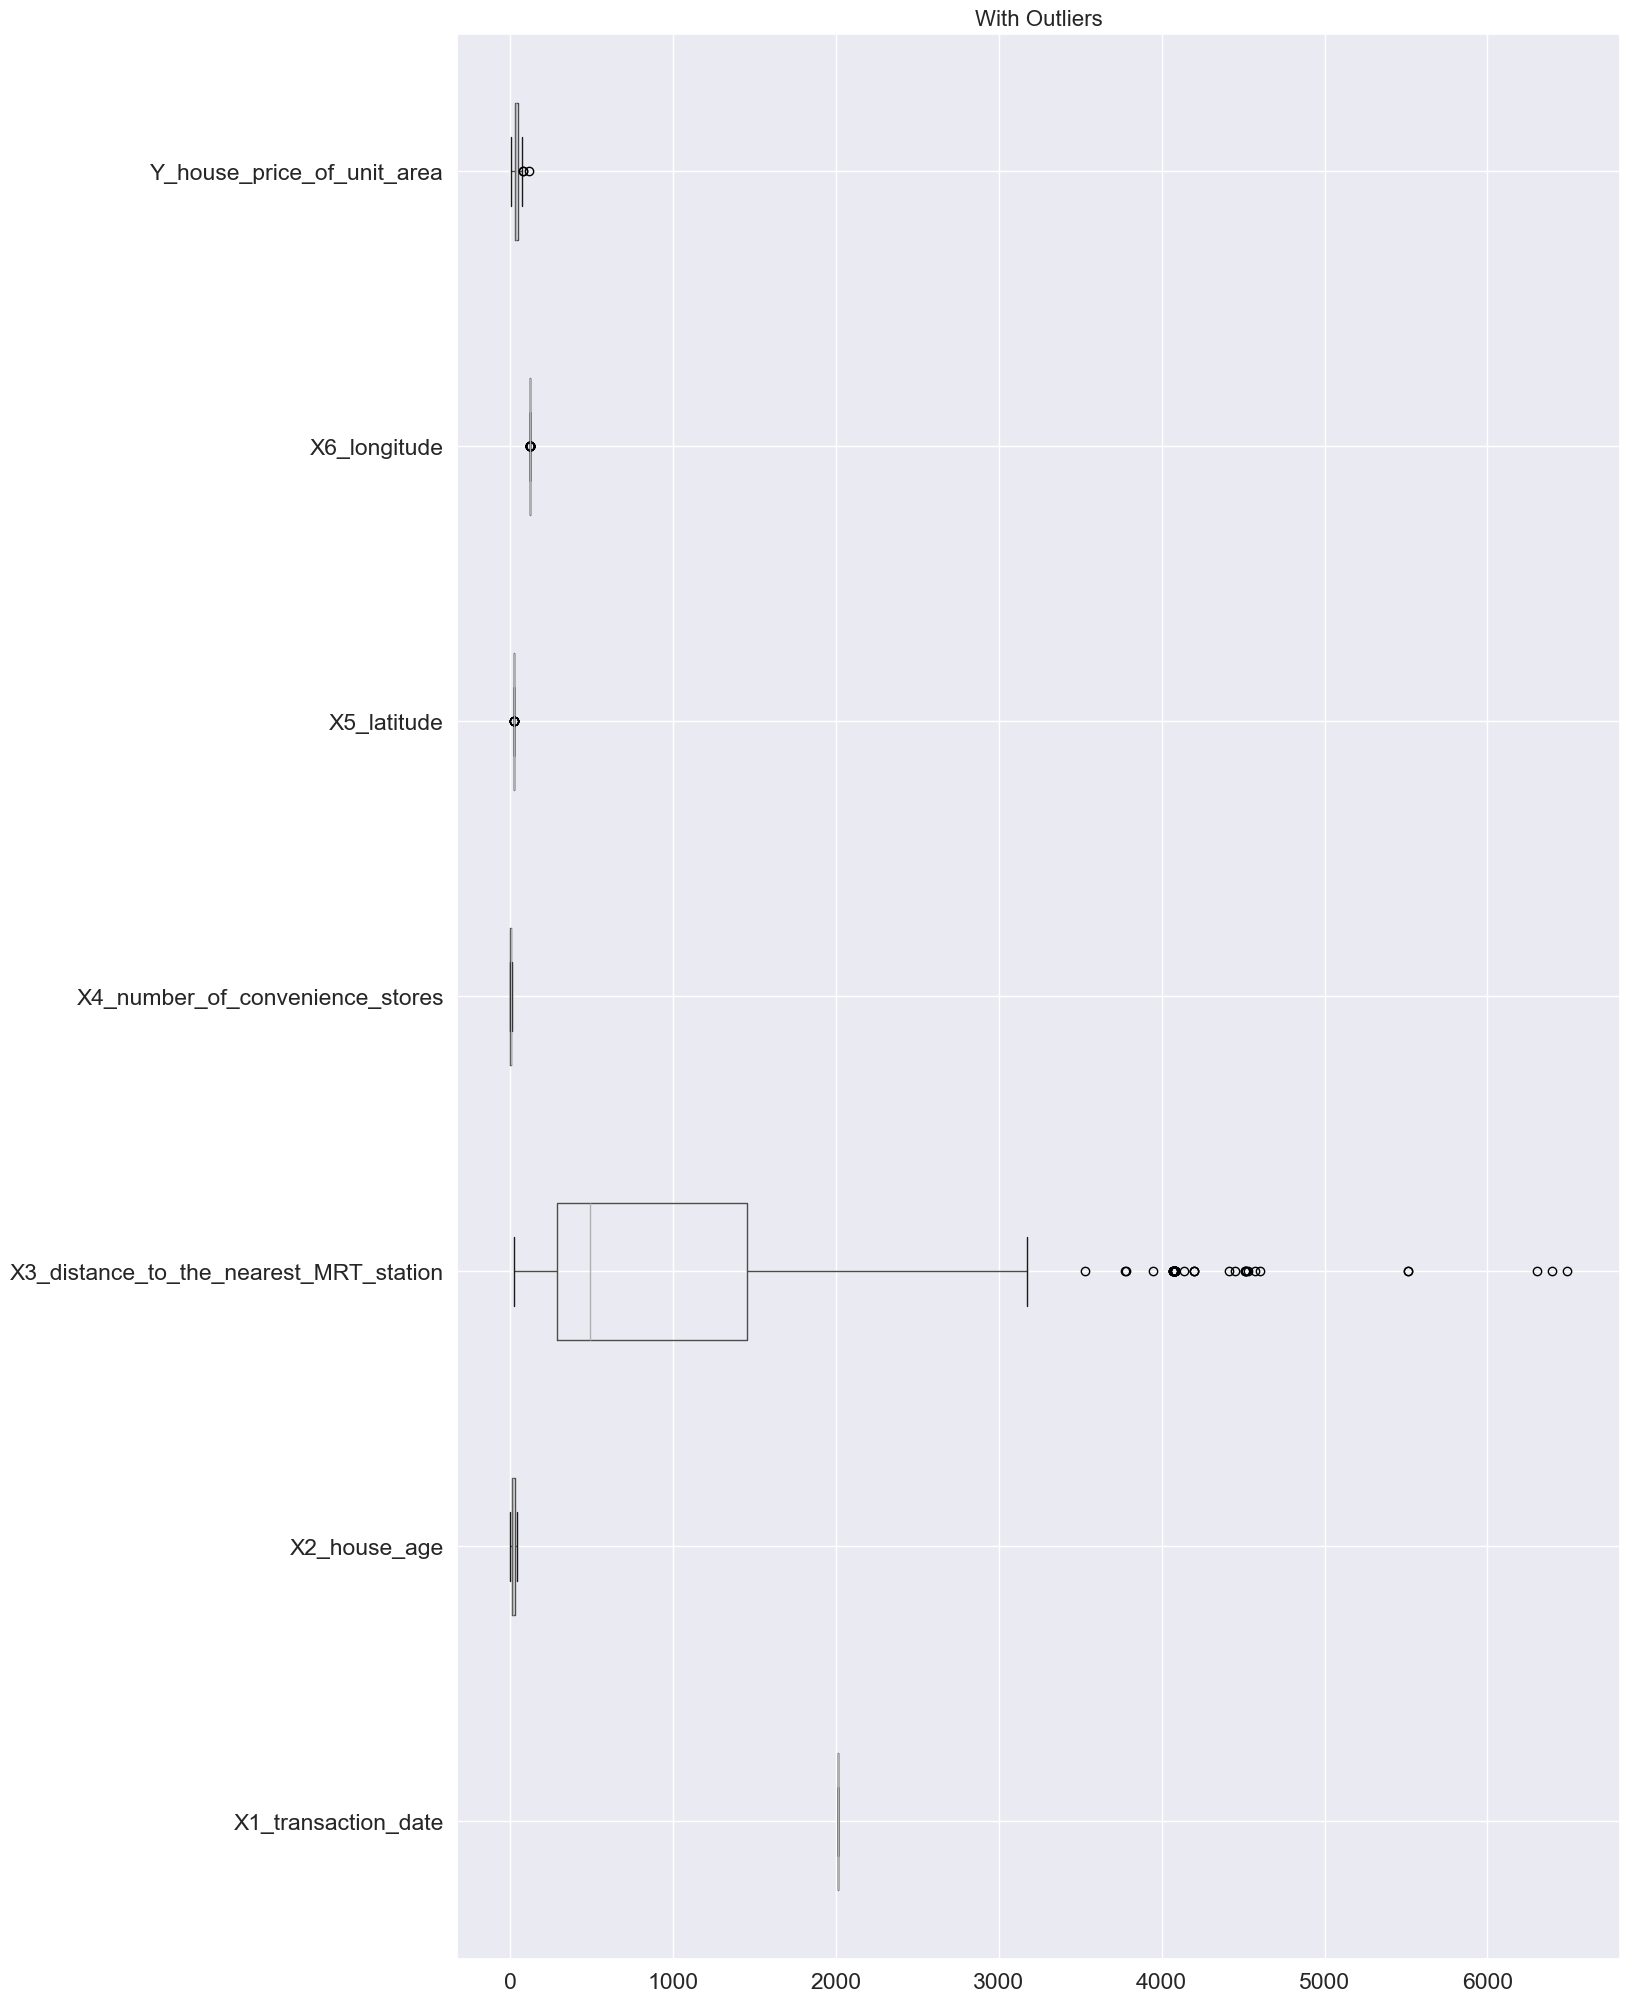

In [9]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(15,25))
sns.set(font_scale=1.5)
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [10]:
# Calculate the upper and lower limits
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [11]:
# Removing the outliers
for column in df.select_dtypes(include=["float64", "int64"]):
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

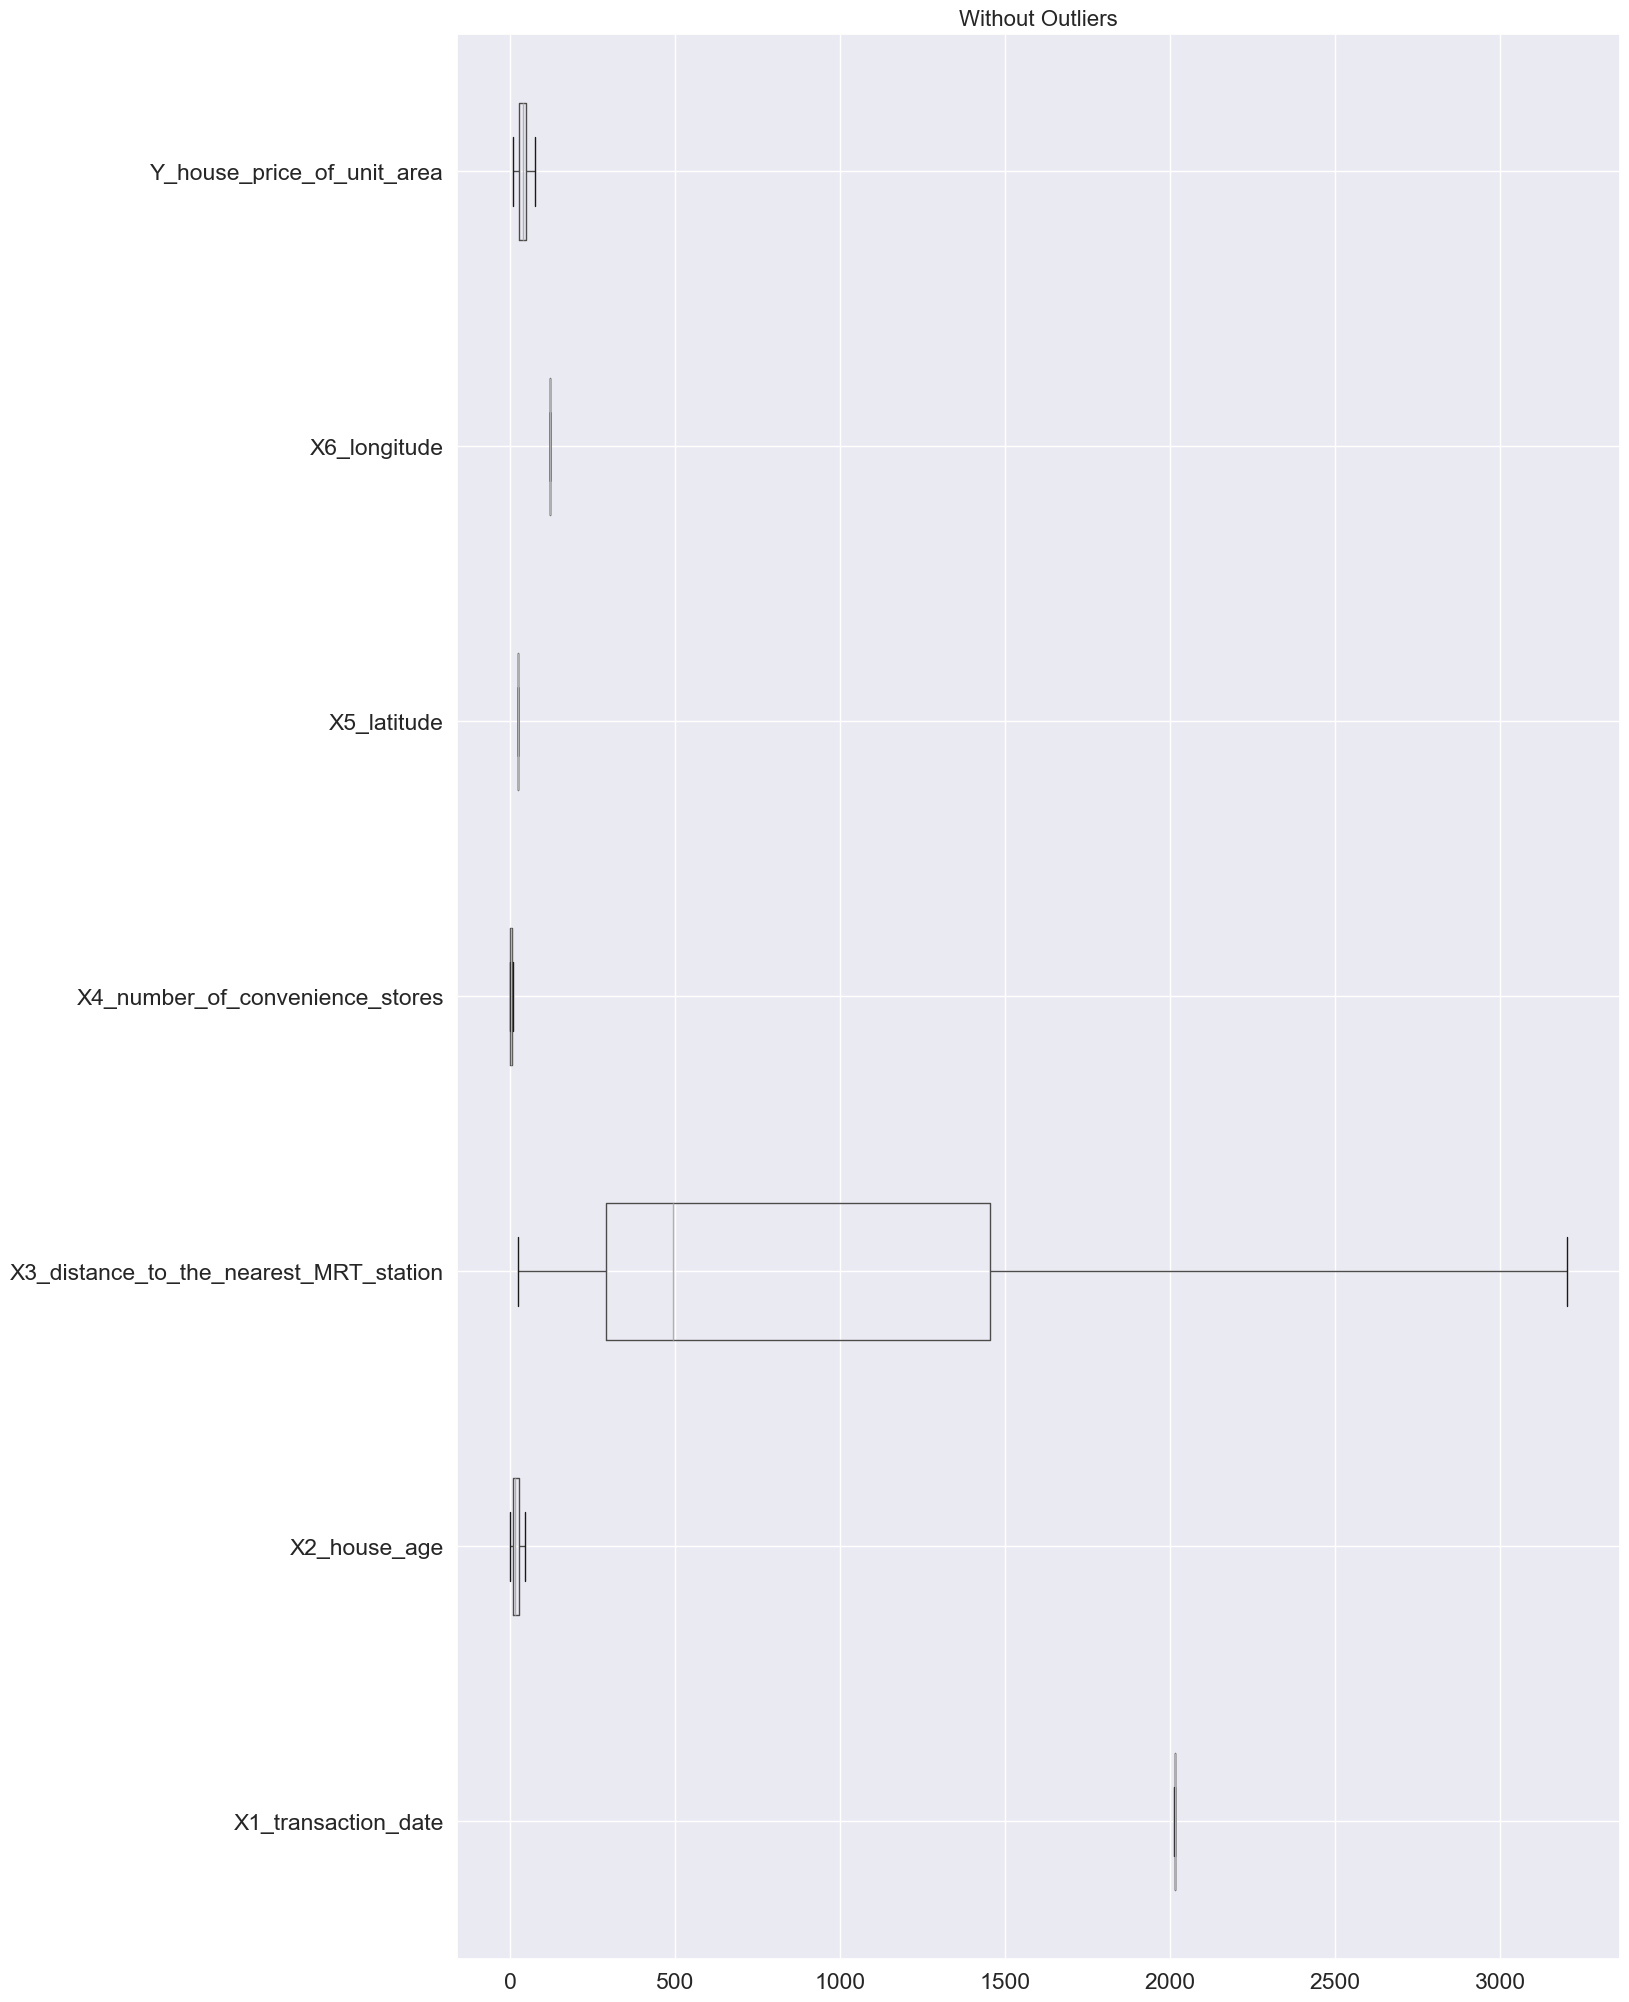

In [12]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(15,25))
sns.set(font_scale=1.5)
df[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

## Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least three performance metrics).

**Splitting Dataset into Training and Testing (67:33).**

**X and Y splitting (i.e. Y is the House Price column and the rest of the other columns are X)**

In [13]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split

X = df.drop(['Y_house_price_of_unit_area'], axis=1)
y = df['Y_house_price_of_unit_area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [14]:
#Standardization cannot be done before the partitioning,as we don't want to fit the StandardScaler on
# some observations that will later be used in the test set.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train

array([[-1.78161796,  1.72166838, -0.02900836, -1.06639762,  0.18972529,
         1.20932948],
       [ 1.18239517,  0.05497584, -0.11346187, -1.39904643, -0.51721187,
         0.99012027],
       [-0.89241399,  0.68656459,  1.83803241, -0.40110001, -0.74467545,
        -1.92476984],
       ...,
       [ 0.5895924 , -0.58538498, -0.72421152, -1.06639762,  0.40409744,
        -0.28440358],
       [-1.18881555, -1.12925307, -0.71682323,  0.59684642,  0.50637423,
         0.80423678],
       [-0.29961157, -1.43627538, -0.78579124,  0.59684642, -0.32329508,
         0.48801267]])

In [16]:
X_train.shape

(277, 6)

In [17]:
X_test.shape

(137, 6)

**LINEAR REGRESSION**

Accuracy on training set :  0.67
Accuracy on testing set :  0.6
MSE on training set :  57.79
RMSE on training set :  7.6
MAE on training set :  5.65
MAPE on training set :  0.16
MSE on testing set :  64.91
RMSE on testing set :  8.06
MAE on testing set :  5.63
MAPE on testing set :  0.2


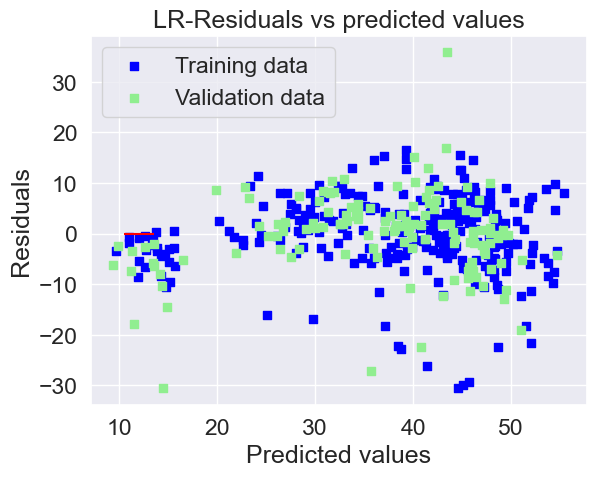

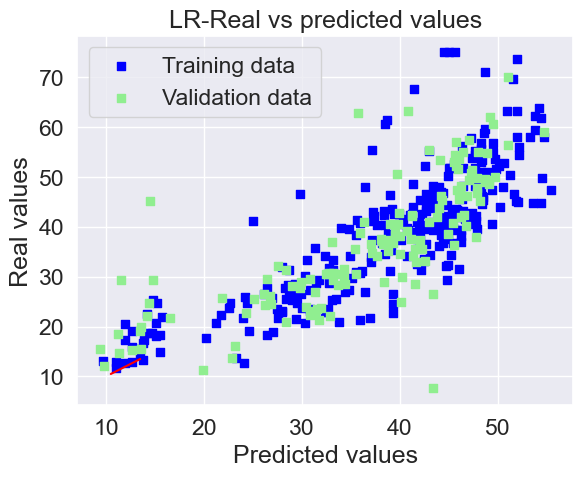

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(lr.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on testing set : ",round(lr.score(X_test,y_test),2)) 
lr_pred_test = lr.predict(X_test)
lr_pred_train = lr.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, lr_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,lr_pred_train))**0.5,2))
#####################
print("MAE on training set : ",round(mean_absolute_error(y_train, lr_pred_train),2))

print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, lr_pred_train),2))

#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, lr_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test,lr_pred_test))**0.5,2))
# MAPE
print("MAE on testing set : ",round(mean_absolute_error(y_test, lr_pred_test),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, lr_pred_test),2))

# Plot residuals
plt.scatter(lr_pred_train, lr_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, lr_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("LR-Residuals vs predicted values")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(lr_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lr_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("LR-Real vs predicted values")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()



we have small dataset with less observations and columns, accuracy is telling our model can explain 67% variance in a training test.

on test set we have 60% accuracy and on training set we 67% accuracy, which is good based on given dataset.

we can see LR-Residuals vs predicted values graph, data points are equally spread, close to zero.

we can see LR-Real vs predicted values graph, data points of training and testing set are close to each other forming a same shape. 


In [19]:
lr.score(X_train,y_train)

0.6716137650040508

In [20]:
lr.coef_

array([ 1.59590535, -2.83426031, -6.81331888,  2.66622505,  3.09869229,
       -0.5272759 ])

In [21]:
lr.intercept_

38.4416967508979

In [22]:
#try to predict random values
lr.predict(np.array([[3,5,6,8,9,5]]))

array([34.75984944])

## Continue from question 2, use leave-one-out validation and five fold cross validation and report the model performance. Compare the three evaluation methods and suggest which one is more reliable. 

**K fold CV**

In [23]:
from sklearn.model_selection import cross_val_score,KFold
from numpy import mean, absolute, sqrt 

leg_reg = LinearRegression()
kfcv = KFold()
Accuracy = cross_val_score(leg_reg, X,y,cv=kfcv, scoring = 'r2').mean()
print(f"Accuracy: {Accuracy:.2f}")

mae = cross_val_score(leg_reg, X,y,cv=kfcv, scoring = 'neg_mean_absolute_error')
mae = mean(absolute(mae))
print(f"MAE: {mae:.2f}")
MAPE = cross_val_score(leg_reg, X,y,cv=kfcv, scoring = 'neg_mean_absolute_percentage_error')
MAPE = mean(absolute(MAPE))
print(f"MAPE: {MAPE:.2f}")
mse = cross_val_score(leg_reg, X,y,cv=kfcv, scoring = 'neg_mean_squared_error')
mse = mean(absolute(mse))
print(f"MSE: {mse:.2f}")

rmse = sqrt(mse)
print(f"RMSE: {rmse:.2f}")

Accuracy: 0.64
MAE: 5.64
MAPE: 0.17
MSE: 60.80
RMSE: 7.80


**Leave One Out CV**

In [24]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
# Initialize LOOCV 
loocv = LeaveOneOut()
# Evaluate model using MAE
scores_mae = cross_val_score(leg_reg, X, y, scoring='neg_mean_absolute_error', cv=loocv, n_jobs=-1)
mae = mean(absolute(scores_mae))
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Evaluate model using RMSE
scores_rmse = cross_val_score(leg_reg, X, y, scoring='neg_mean_squared_error', cv=loocv, n_jobs=-1)
rmse = sqrt(mean(absolute(scores_rmse)))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Evaluate model using MSE
mse = cross_val_score(leg_reg, X, y, scoring='neg_mean_squared_error', cv=loocv, n_jobs=-1)
mse = mean(absolute(mse))
print(f"Mean Squared Error (MSE): {mse:.2f}")
MAPE = cross_val_score(leg_reg, X,y,cv=loocv, scoring = 'neg_mean_absolute_percentage_error')
MAPE = mean(absolute(MAPE))
print(f"MAPE: {MAPE:.2f}")

Mean Absolute Error (MAE): 5.69
Root Mean Squared Error (RMSE): 7.87
Mean Squared Error (MSE): 61.88
MAPE: 0.17


In [25]:
metrics = {'model_name': ['Linear Regression','KFold CV','LeaveOneOut'],
    'MAE':[5.63,5.64,5.69],
    'MSE':[64.91,60.80,61.88],
    'RMSE':[8.06,7.80,7.87],
    'MAPE':[0.20,0.17,0.17]}

In [26]:
model3 = pd.DataFrame(metrics)

In [27]:
model3

,model_name,MAE,MSE,RMSE,MAPE
0,Linear Regression,5.630,64.910,8.060,0.200
1,KFold CV,5.640,60.800,7.800,0.170
2,LeaveOneOut,5.690,61.880,7.870,0.170


we can see above  KFold CV error rate is little bit less than LeaveOneOut so KFold has performed little bit better than LeaveOneOut CV.

## Continue from question 2, apply L1 and L2 regularization on the linear regression model developed using the same training set. Compare the performance and indicate key findings. 

**Lasso L1**

Accuracy on training set :  0.67
Accuracy on testing set :  0.6
MSE on training set :  57.79
RMSE on training set :  7.6
MAE on training set :  5.65
MAPE on training set :  0.16
MSE on testing set :  64.83
RMSE on testing set :  8.05
MAE on testing set :  5.63
MAPE on testing set :  0.2


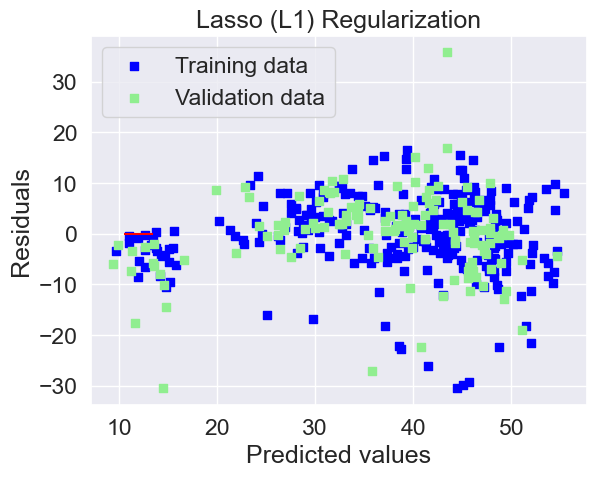

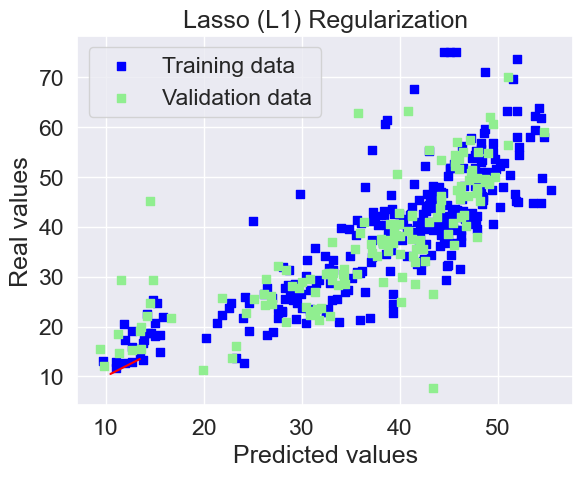

In [28]:
from sklearn.linear_model import Lasso, Ridge
# Train linear regression models with L1 regularization
alpha_l1 = 0.01  # L1 regularization strength
lasso_model = Lasso(alpha=alpha_l1)
lasso_model.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(lasso_model.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on testing set : ",round(lasso_model.score(X_test,y_test),2)) 
############################
lasso_model_pred_test = lasso_model.predict(X_test)
lasso_model_pred_train = lasso_model.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, lasso_model_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,lasso_model_pred_train))**0.5,2))
#####################
print("MAE on training set : ",round(mean_absolute_error(y_train, lasso_model_pred_train),2))

print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, lasso_model_pred_train),2))

#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, lasso_model_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test, lasso_model_pred_test))**0.5,2))
# MAPE
print("MAE on testing set : ",round(mean_absolute_error(y_test, lasso_model_pred_test),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, lasso_model_pred_test),2))

# Plot residuals
plt.scatter(lasso_model_pred_train, lasso_model_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lasso_model_pred_test, lasso_model_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso (L1) Regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(lasso_model_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(lasso_model_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Lasso (L1) Regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

**Ridge L2**

In [29]:
from sklearn.linear_model import Lasso

Accuracy on training set :  0.67
Accuracy on testing set :  0.6
MSE on training set :  57.79
RMSE on training set :  7.6
MAE on training set :  5.65
MAPE on training set :  0.16
MSE on testing set :  64.9
RMSE on testing set :  8.06
MAE on testing set :  5.63
MAPE on testing set :  0.2


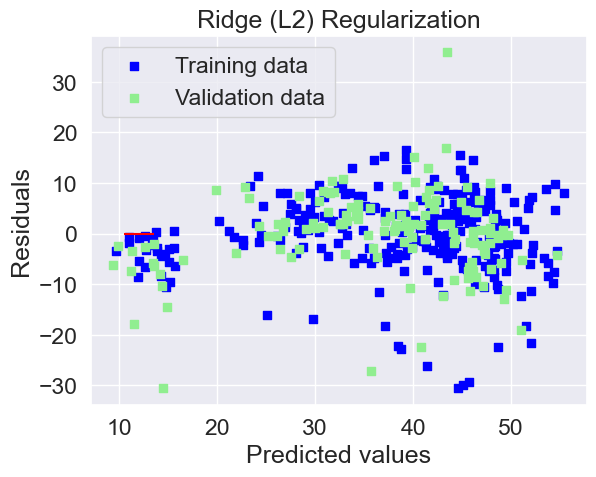

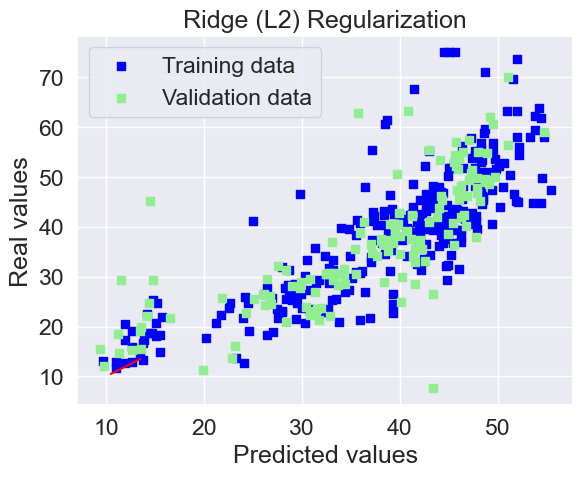

In [30]:
alpha_l2 = 0.01   # L2 regularization strength
ridge_model = Ridge(alpha=alpha_l2)
ridge_model.fit(X_train,y_train)
# R square on training data
print("Accuracy on training set : ",round(ridge_model.score(X_train, y_train),2))
# R square on testing data
print("Accuracy on testing set : ",round(ridge_model.score(X_test,y_test),2)) 
############################
ridge_model_pred_test = ridge_model.predict(X_test)
ridge_model_pred_train = ridge_model.predict(X_train)
#MSE on Training data
print("MSE on training set : ",round(mean_squared_error(y_train, ridge_model_pred_train),2))
#RMSE on Training data
print("RMSE on training set : ",round((mean_squared_error(y_train,ridge_model_pred_train))**0.5,2))
#####################
print("MAE on training set : ",round(mean_absolute_error(y_train, ridge_model_pred_train),2))

print("MAPE on training set : ",round(mean_absolute_percentage_error(y_train, ridge_model_pred_train),2))

#MSE on test data
print("MSE on testing set : ",round(mean_squared_error(y_test, ridge_model_pred_test),2))
#RMSE on test data
print("RMSE on testing set : ",round((mean_squared_error(y_test, ridge_model_pred_test))**0.5,2))
# MAPE
print("MAE on testing set : ",round(mean_absolute_error(y_test, ridge_model_pred_test),2))
print("MAPE on testing set : ",round(mean_absolute_percentage_error(y_test, ridge_model_pred_test),2))

# Plot residuals
plt.scatter(ridge_model_pred_train, ridge_model_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(ridge_model_pred_test, ridge_model_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge (L2) Regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(ridge_model_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(ridge_model_pred_test, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Ridge (L2) Regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()


In [31]:
metrics = {'model_name': ['Accuracy on training set','Accuracy on testing set','MSE on training set','MSE on testing set',
                          'RMSE on training set','RMSE on testing set','MAE on training set','MAE on testing set',
                          'MAPE on training set','MAPE on testing set'],
    'L1 Lasso':[0.67,0.60,57.79,64.83,7.6,8.05,5.65,5.63,0.16,0.2],
    'L2 Ridge':[0.67,0.60,57.79,64.9,7.6,8.06,5.65,5.63,0.16,0.2]}


In [32]:
two_Regularization_models = pd.DataFrame(metrics)

In [33]:
two_Regularization_models

,model_name,L1 Lasso,L2 Ridge
0,Accuracy on training set,0.670,0.670
1,Accuracy on testing set,0.600,0.600
2,MSE on training set,57.790,57.790
3,MSE on testing set,64.830,64.900
4,RMSE on training set,7.600,7.600
5,RMSE on testing set,8.050,8.060
6,MAE on training set,5.650,5.650
7,MAE on testing set,5.630,5.630
8,MAPE on training set,0.160,0.160
9,MAPE on testing set,0.200,0.200


after applying same alpha value(0.01),Both models evaluation metrics are almost same.

our dataset is small.with regularization and without regularization all three models has performed almost same.

its performance may increase if we will apply grid search CV for best parameters but i did some hyper parameter tuning training accuracy just increase little bit so basd on given data size this model is good.

